In [2]:
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import re
import jieba
from jieba import analyse
from snownlp import SnowNLP
from wordcloud import WordCloud  # 词云展示模块
from wordcloud import ImageColorGenerator
import PIL.Image as image  # 图像处理模块
import matplotlib.pyplot as plt  # 图像展示模块
import matplotlib.font_manager as fm  # 中文处理模块
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [131]:
os.chdir(r"D:\gechengcheng3\Desktop\hotpot")
raw_comment = pd.read_csv(r"hotpot_gcc_comments.csv", sep='\t', nrows=10000) #先取出两千条分析

In [132]:
raw_comment.drop("item_last_cate_cd",axis=1,inplace=True)

In [133]:
raw_comment.dropna(axis=0).reset_index(range(len(raw_comment)),drop=True)

,item_sku_id,comment_create_tm,comment_content
0,100000120631,2019-07-01 01:12:44,还不错的哟，下次再买过挺好吃的
1,100000120631,2019-07-01 07:04:13,此用户未填写评价内容
2,100000120631,2019-07-01 07:51:18,此用户未填写评价内容
3,100000120631,2019-07-01 07:53:47,海底捞自热火锅 第二碗
4,100000120631,2019-07-01 08:57:40,还没有吃，看着还行吧。期待中
5,100000120631,2019-07-01 10:08:34,很好吃，辣味十足，吃不了辣的放一点点就够了
6,100000120631,2019-07-01 10:20:26,此用户未填写评价内容
7,100000120631,2019-07-01 11:16:27,此用户未填写评价内容
8,100000120631,2019-07-01 12:35:40,自热锅确实挺方便的。看是藤椒的以为不辣。结果全家就我自己能吃。
9,100000120631,2019-07-01 12:48:43,味道不错


In [134]:
raw_comment_clean = raw_comment.loc[(raw_comment["comment_content"].notnull()) & (raw_comment["comment_content"] != "此用户未填写评价内容"), :].copy() # 或者的条件用 |

In [135]:
raw_comment_clean

,item_sku_id,comment_create_tm,comment_content
5,100000120631,2019-07-01 01:12:44,还不错的哟，下次再买过挺好吃的
8,100000120631,2019-07-01 07:53:47,海底捞自热火锅 第二碗
9,100000120631,2019-07-01 08:57:40,还没有吃，看着还行吧。期待中
10,100000120631,2019-07-01 10:08:34,很好吃，辣味十足，吃不了辣的放一点点就够了
13,100000120631,2019-07-01 12:35:40,自热锅确实挺方便的。看是藤椒的以为不辣。结果全家就我自己能吃。
14,100000120631,2019-07-01 12:48:43,味道不错
15,100000120631,2019-07-01 13:17:09,一直在京东购物，非常方便，价格实惠
18,100000120631,2019-07-01 14:07:20,不错，这个就方便了， 一人量。太方便了
19,100000120631,2019-07-01 14:19:53,商品很不错，是我喜欢喜欢的那个skr～
23,100000120631,2019-07-01 16:09:33,我为什么喜欢在京东买东西，因为今天买明天就可以送到。


In [138]:
# 计算情感倾向得分
def sentiments_analysis(sentence):  # 利用snowNLP包定义情感分析函数，输出得分：得分越靠近1视为肯定，靠近0视为否定
    sentence_score = SnowNLP(sentence).sentiments # 提取情感分析的得分
    return sentence_score

In [139]:
raw_comment_clean["sentence_score"] = raw_comment_clean["comment_content"].apply(sentiments_analysis)

In [140]:
raw_comment_clean.drop(raw_comment_clean.loc[raw_comment_clean["comment_content"]=="您没有填写内容，默认好评"].index.values,inplace=True)

In [141]:
raw_comment_clean

,item_sku_id,comment_create_tm,comment_content,sentence_score
5,100000120631,2019-07-01 01:12:44,还不错的哟，下次再买过挺好吃的,0.942040
8,100000120631,2019-07-01 07:53:47,海底捞自热火锅 第二碗,0.776157
9,100000120631,2019-07-01 08:57:40,还没有吃，看着还行吧。期待中,0.945902
10,100000120631,2019-07-01 10:08:34,很好吃，辣味十足，吃不了辣的放一点点就够了,0.972562
13,100000120631,2019-07-01 12:35:40,自热锅确实挺方便的。看是藤椒的以为不辣。结果全家就我自己能吃。,0.541590
14,100000120631,2019-07-01 12:48:43,味道不错,0.808069
15,100000120631,2019-07-01 13:17:09,一直在京东购物，非常方便，价格实惠,0.967200
18,100000120631,2019-07-01 14:07:20,不错，这个就方便了， 一人量。太方便了,0.724975
19,100000120631,2019-07-01 14:19:53,商品很不错，是我喜欢喜欢的那个skr～,0.974656
23,100000120631,2019-07-01 16:09:33,我为什么喜欢在京东买东西，因为今天买明天就可以送到。,0.468098


In [142]:
def mappings(score):
    if score >= 0.7:
        return 2
    elif score > 0.2:
        return 1
    else:
        return 0

In [143]:
raw_comment_clean["label"] = raw_comment_clean["sentence_score"].apply(mappings)

In [174]:
raw_comment_clean["label"].value_counts(normalize=True).sort_values(ascending=False) 
# 样本不平衡，正负样本4:1,normalize实现归一化

2    0.592172
1    0.312079
0    0.095749
Name: label, dtype: float64

In [168]:
# 语料分类
positive_corpus= raw_comment_clean.loc[raw_comment_clean["label"] == 2, :]
negative_corpus = raw_comment_clean.loc[raw_comment_clean["label"] == 0, :]

In [169]:
positive_corpus

,item_sku_id,comment_create_tm,comment_content,sentence_score,label
5,100000120631,2019-07-01 01:12:44,还不错的哟，下次再买过挺好吃的,0.942040,2
8,100000120631,2019-07-01 07:53:47,海底捞自热火锅 第二碗,0.776157,2
9,100000120631,2019-07-01 08:57:40,还没有吃，看着还行吧。期待中,0.945902,2
10,100000120631,2019-07-01 10:08:34,很好吃，辣味十足，吃不了辣的放一点点就够了,0.972562,2
14,100000120631,2019-07-01 12:48:43,味道不错,0.808069,2
15,100000120631,2019-07-01 13:17:09,一直在京东购物，非常方便，价格实惠,0.967200,2
18,100000120631,2019-07-01 14:07:20,不错，这个就方便了， 一人量。太方便了,0.724975,2
19,100000120631,2019-07-01 14:19:53,商品很不错，是我喜欢喜欢的那个skr～,0.974656,2
26,100000120631,2019-07-01 19:10:46,还不错,0.883015,2
36,100000120631,2019-07-02 00:41:44,好吃，味道正宗，分量也很足，海底捞果然大片的牛肉自己感受吧，经常都会买，每次都会买很多，不是...,0.999875,2


In [170]:
negative_corpus # 61 80 287 320 501 570  729

,item_sku_id,comment_create_tm,comment_content,sentence_score,label
57,100000120631,2019-07-02 17:29:11,还没打开，先评价吧,1.472477e-01,0
58,100000120631,2019-07-02 17:39:58,不好吃 不值,1.348368e-01,0
60,100000120631,2019-07-02 20:18:43,不好，筷子黑色的头，少一个，怎么吃呀,5.360551e-02,0
61,100000120631,2019-07-02 21:05:10,还可以，牛肉的肉很多,1.833606e-01,0
75,100000120631,2019-07-03 10:34:25,不好吃不好吃不好吃不好吃,7.135778e-03,0
80,100000120631,2019-07-03 13:43:53,京东快递给力，京东快递给力，京东快递给力，京东快递给力，,8.035454e-03,0
122,100000120631,2019-07-04 19:41:33,还没有吃，买回来才发现是藤椒味的，藤椒的感觉不太好吃呀，没有注意口味，尴尬了,3.835157e-02,0
147,100000120631,2019-07-05 15:55:47,味道还可以，量少，性价比低。,9.932635e-02,0
163,100000120631,2019-07-06 09:30:24,太辣，对于我这种不能吃辣的人来说不好,1.771031e-01,0
287,100000120631,2019-07-12 03:11:41,味道好极了，一共买了五中,1.457276e-01,0


In [172]:
import jiagu
jiagu.sentiment("自己在家懒得做饭的时候，最方便了，15分钟就能吃")

('negative', 0.9912003092176036)

In [147]:
# 文本清洗
pattern = re.compile(r'[^\u4e00-\u9fa5]+')
corpus_clean_negative = []
for raw in negative_corpus["comment_content"]:
    raw = pattern.sub('', str(raw))
    raw = raw.strip()
    corpus_clean_negative.append(raw)

In [148]:
# 文本清洗
pattern = re.compile(r'[^\u4e00-\u9fa5]+')
corpus_clean_positive = []
for raw in positive_corpus["comment_content"]:
    raw = pattern.sub('', str(raw))
    raw = raw.strip()
    corpus_clean_positive.append(raw)

In [151]:
jieba.load_userdict("userdict.txt")
jieba.add_word("直流口水")
jieba.add_word("不好吃")
jieba.add_word("超级难吃")
jieba.add_word("性价比低")
jieba.add_word("东西太少")
jieba.add_word("太油腻")
def fenci(data):    
    return " ".join(jieba.cut(data)).split()

list_clean_corpus_positive = []
for i in corpus_clean_positive:
    temp = fenci(i)
    list_clean_corpus_positive.append(temp)

list_clean_corpus_negative = []
for i in corpus_clean_negative:
    temp = fenci(i)
    list_clean_corpus_negative.append(temp)

In [152]:
def fenci(data):    
    return " ".join(jieba.cut(data)).split()

In [153]:
list_clean_corpus_positive = []
for i in corpus_clean_positive:
    temp = fenci(i)
    list_clean_corpus_positive.append(temp)
list_clean_corpus_negative = []
for i in corpus_clean_negative:
    temp = fenci(i)
    list_clean_corpus_negative.append(temp)

In [154]:
L_corpus_filter_one_positive = [[x for x in text if len(x)>1] for text in list_clean_corpus_positive]
L_corpus_filter_one_negative = [[x for x in text if len(x)>1] for text in list_clean_corpus_negative]

In [155]:
# 去停用词
f=open('stop_words.txt', "r", encoding='UTF-8')
stop_words_string = f.readlines()
f.close()
stop_word = [x[:-1] for x in stop_words_string] # 去除"\n"

In [156]:
"老爸" in stop_word

True

In [157]:
stop_words_set = set(stop_word)

In [158]:
L_corpus_positive = []
for text in L_corpus_filter_one_positive:
    l_temp = []
    for word in text:
        if word not in stop_words_set:
            l_temp.append(word)
    L_corpus_positive.append(l_temp)

L_corpus_negative = []
for text in L_corpus_filter_one_negative:
    l_temp = []
    for word in text:
        if word not in stop_words_set:
            l_temp.append(word)
    L_corpus_negative.append(l_temp)

In [113]:
L_corpus_positive

[[],
 ['不好吃', '不值'],
 ['不好', '筷子', '黑色', '头少'],
 ['牛肉'],
 ['好吃', '价钱', '现在', '锁机'],
 ['不好吃', '不好吃', '不好吃', '不好吃'],
 ['递给', '递给', '递给', '递给'],
 ['好吃', '加个', '火腿肠', '鸡蛋', '美味'],
 ['买回来', '发现', '藤椒味', '藤椒', '不太', '好吃', '注意', '口味', '尴尬'],
 ['味道', '量少', '性价比'],
 ['太辣', '这种', '不能', '不好'],
 ['超级', '难吃', '吃火锅', '店里'],
 ['太少'],
 ['味道', '好极了', '一共', '五中'],
 ['好吃', '不能', '沾油'],
 ['次日', '方便', '习惯', '物流', '快递', '负责', '任买', '多次'],
 ['太辣', '个人', '自嗨锅', '口味'],
 ['味道', '半生不熟', '燃气', '报警', '系统', '报警', '报警'],
 ['好不好'],
 ['同事', '买过', '好吃', '几单', '太辣', '少放料', '不够', '适合', '会吃', '个人'],
 ['炒鸡辣', '鸡爽', '看到', '不用', '煮熟', '火锅', '下次', '快递', '感大'],
 ['太累', '太累', '太累', '太累'],
 ['好辣', '不能', '太卡', '山药', '别放', '全料'],
 ['很大', '一盒', '准备', '出去玩', '路上', '味道'],
 ['吃藤椒味', '有点像', '方便面', '味道'],
 ['好吃'],
 ['说好', '好好', '好好'],
 ['在家', '最好', '選擇', '味道', '實體', '一樣', '好吃'],
 ['没什么', '味道', '不好', '店里'],
 ['太少'],
 ['味道', '还行', '可能', '料太多'],
 ['不好吃', '这份', '口味', '全素', '全家', '喜欢', '食材', '不是太好', '不值'],
 ['太辣', '太辣', '太辣', '重要', '事情', '三遍

In [159]:
# 统计词频
from collections import defaultdict
frequency = defaultdict(int)
for text in L_corpus_positive:
    for token in text:
        frequency[token] += 1
# print(len(frequency))
frequency_sort = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
frequency_sort_positive = pd.DataFrame(frequency_sort, columns=["词语", "词频"])
print("打印词频如下表:","\n")
frequency_sort_positive


打印词频如下表: 



,词语,词频
0,味道,117
1,好吃,108
2,好评,61
3,火锅,52
4,太辣,45
5,小龙坎,37
6,快递,36
7,不会,36
8,喜欢,32
9,不错,28


In [160]:
# 统计词频
frequency = defaultdict(int)
for text in L_corpus_negative:
    for token in text:
        frequency[token] += 1
# print(len(frequency))
frequency_sort = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
frequency_sort_negative = pd.DataFrame(frequency_sort, columns=["词语", "词频"])
print("打印词频如下表:","\n")
frequency_sort_negative

打印词频如下表: 



,词语,词频
0,不错,1385
1,好吃,959
2,味道,766
3,好好,431
4,喜欢,409
5,方便,356
6,火锅,271
7,满意,243
8,物流,224
9,购买,214


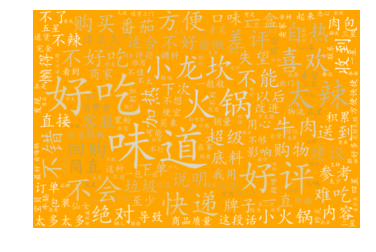

In [162]:
# 绘制词云图可视化搜索关键词
%matplotlib inline
from wordcloud import WordCloud  # 词云展示模块
from wordcloud import ImageColorGenerator
import PIL.Image as image  # 图像处理模块
import matplotlib.pyplot as plt  # 图像展示模块
import matplotlib.font_manager as fm  # 中文处理模块
sentence = []
for sent in L_corpus_positive:
    text = " ".join(sent)
    sentence.append(text)
text = " ".join(sentence)
mask = np.array(image.open('2.jpg'))  # 图片背景参考形状
wc = WordCloud(
    background_color="orange",  # 背景颜色
    max_words=200,  # 最多显示的词数
    mask=mask,  # 设置图片的背景
    collocations=False,
    max_font_size=80,  # 最大的字符
    random_state=10,  # 设置有多少种随机生成状态，即有多少种配色方案
    font_path=r'C:/Windows/Fonts/simkai.ttf'  # 中文处理，用系统自带的字体
).generate(text)  # generate 只能处理str文本不能处理list文本
# 对词云图各项参数进行调整，使词云图更美观
my_font = fm.FontProperties(fname=r'C:/Windows/Fonts/simkai.ttf')  # 词云字体设置
image_colors = ImageColorGenerator(mask)  # 基于彩色图像的颜色生成器 提取背景图片颜色
wc.recolor(color_func=image_colors)  # 将词云颜色设置为背景图的颜色
plt.axis("off")  # 为云图去掉坐标轴
plt.imshow(wc, interpolation="bilinear")  # 开始画图
wc.to_file("positive.png")  # 输出一个png文件保存云图

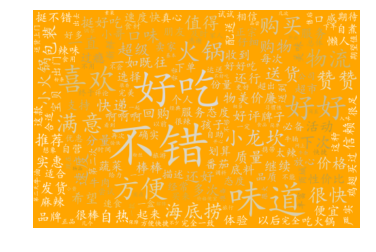

In [163]:
# 绘制词云图可视化搜索关键词
%matplotlib inline
from wordcloud import WordCloud  # 词云展示模块
from wordcloud import ImageColorGenerator
import PIL.Image as image  # 图像处理模块
import matplotlib.pyplot as plt  # 图像展示模块
import matplotlib.font_manager as fm  # 中文处理模块
sentence = []
for sent in L_corpus_negative:
    text = " ".join(sent)
    sentence.append(text)
text = " ".join(sentence)
mask = np.array(image.open('2.jpg'))  # 图片背景参考形状
wc = WordCloud(
    background_color="orange",  # 背景颜色
    max_words=200,  # 最多显示的词数
    mask=mask,  # 设置图片的背景
    collocations=False,
    max_font_size=80,  # 最大的字符
    random_state=10,  # 设置有多少种随机生成状态，即有多少种配色方案
    font_path=r'C:/Windows/Fonts/simkai.ttf'  # 中文处理，用系统自带的字体
).generate(text)  # generate 只能处理str文本不能处理list文本
# 对词云图各项参数进行调整，使词云图更美观
my_font = fm.FontProperties(fname=r'C:/Windows/Fonts/simkai.ttf')  # 词云字体设置
image_colors = ImageColorGenerator(mask)  # 基于彩色图像的颜色生成器 提取背景图片颜色
wc.recolor(color_func=image_colors)  # 将词云颜色设置为背景图的颜色
plt.axis("off")  # 为云图去掉坐标轴
plt.imshow(wc, interpolation="bilinear")  # 开始画图
wc.to_file("negative.png")  # 输出一个png文件保存云图

In [164]:
from gensim import corpora, models

# 构造词典
dictionary_nega = corpora.Dictionary(L_corpus_positive)
# 基于词典，使【词】→【稀疏向量】，并将向量放入列表，形成【稀疏向量集】
corpus_nega = [dictionary_nega.doc2bow(words) for words in L_corpus_filter_one_negative]
# lda模型，num_topics设置主题的个数
lda = models.ldamodel.LdaModel(corpus=corpus_nega, id2word=dictionary_nega, num_topics=4)
# 打印所有主题，每个主题显示5个词
for topic in lda.print_topics(num_words=10):
    print(topic)
# 主题推断
# print(lda.inference(L_corpus_filter_one_negative))

(0, '0.169*"好吃" + 0.078*"喜欢" + 0.051*"满意" + 0.029*"不错" + 0.027*"还好" + 0.021*"海底捞" + 0.020*"味道" + 0.019*"还行" + 0.016*"方便" + 0.014*"棒棒"')
(1, '0.062*"火锅" + 0.050*"小龙坎" + 0.046*"好吃" + 0.046*"方便" + 0.025*"不错" + 0.022*"挺好吃" + 0.021*"味道" + 0.018*"过瘾" + 0.018*"喜欢" + 0.015*"超级"')
(2, '0.058*"味道" + 0.055*"好吃" + 0.040*"送货" + 0.038*"购买" + 0.029*"不错" + 0.022*"小火锅" + 0.016*"火锅" + 0.016*"多次" + 0.015*"一直" + 0.014*"继续"')
(3, '0.221*"不错" + 0.079*"味道" + 0.031*"物流" + 0.026*"很快" + 0.023*"方便" + 0.019*"满意" + 0.017*"购买" + 0.017*"好吃" + 0.016*"速度" + 0.015*"值得"')


In [166]:
L_corpus_negative

[['不错', '下次', '挺好吃'],
 ['海底捞', '自热', '火锅', '第二碗'],
 ['还行', '期待'],
 ['好吃', '辣味', '十足', '不了', '一点点', '就够'],
 ['味道', '不错'],
 ['一直', '购物', '方便', '价格', '实惠'],
 ['不错', '方便', '一人量', '方便'],
 ['不错', '喜欢', '喜欢'],
 ['不错'],
 ['好吃',
  '味道',
  '正宗',
  '分量',
  '海底捞',
  '大片',
  '牛肉',
  '感受',
  '经常',
  '每次',
  '辣辣的',
  '味道',
  '底料',
  '味道',
  '很正',
  '牛肉',
  '口感',
  '很棒',
  '莲藕',
  '土豆',
  '爽口',
  '入味',
  '木耳',
  '海带',
  '稍微',
  '硬薯',
  '入味',
  '整体',
  '满意',
  '超级',
  '好吃'],
 ['味道', '玩笑'],
 ['喜欢', '口味'],
 [],
 ['蔬菜', '新鲜', '味道', '旅行', '必备'],
 ['好吃', '看得见', '味道', '真棒', '价格便宜'],
 ['好吃', '方便', '无限', '回购', '上班族', '福音'],
 ['好好', '好好', '好好', '好好', '好好', '好好', '好好', '好好'],
 ['不错', '推荐'],
 ['海底捞', '小火锅', '方便', '尝试', '多种', '口味', '不错', '咸香', '还加', '两个', '够用'],
 ['一直', '海底捞', '自热', '火锅', '好吃'],
 ['配送', '速度', '很快', '上午', '下单', '收到'],
 ['质量', '价格低', '发货', '服务', '顾客', '送货上门', '放心'],
 ['好几种',
  '口味',
  '真心',
  '不错',
  '内容',
  '自嗨锅',
  '差点',
  '唯一',
  '值得',
  '海底捞',
  '味道',
  '口味',
  '合适',
  '不错'],
 ['味道', '不错', '起来',

In [165]:
from gensim import corpora, models

# 构造词典
dictionary_nega = corpora.Dictionary(L_corpus_negative)
# 基于词典，使【词】→【稀疏向量】，并将向量放入列表，形成【稀疏向量集】
corpus_nega = [dictionary_nega.doc2bow(words) for words in L_corpus_filter_one_negative]
# lda模型，num_topics设置主题的个数
lda = models.ldamodel.LdaModel(corpus=corpus_nega, id2word=dictionary_nega, num_topics=4)
# 打印所有主题，每个主题显示5个词
for topic in lda.print_topics(num_words=10):
    print(topic)
# 主题推断
# print(lda.inference(corpus))

(0, '0.033*"好吃" + 0.029*"喜欢" + 0.027*"小龙坎" + 0.020*"味道" + 0.020*"还好" + 0.019*"火锅" + 0.016*"活动" + 0.014*"超级" + 0.012*"物美价廉" + 0.011*"方便"')
(1, '0.150*"不错" + 0.071*"好吃" + 0.060*"好好" + 0.055*"味道" + 0.028*"喜欢" + 0.020*"火锅" + 0.019*"方便" + 0.015*"赞赞" + 0.011*"满意" + 0.009*"海底捞"')
(2, '0.032*"不错" + 0.028*"购买" + 0.027*"好吃" + 0.024*"味道" + 0.024*"方便" + 0.023*"送货" + 0.017*"很快" + 0.013*"值得" + 0.013*"物流" + 0.010*"多次"')
(3, '0.045*"满意" + 0.045*"不错" + 0.040*"好吃" + 0.028*"味道" + 0.019*"物流" + 0.017*"还行" + 0.016*"下次" + 0.012*"很快" + 0.012*"购物" + 0.010*"喜欢"')


# 基于词典的文本情感打分的效果并不好，很容易错判，考虑使用Word2vec,需要有监督学习

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
def build_sentence_vector(text,size,w2v_model):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in text:
        try:
            vec+=w2v_model[word].reshape((1,size))
            count+=1
        except KeyError:
            continue
    if count!=0:
        vec/=count
    return vec